In [1]:
import pandas as pd 
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D


from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight


In [2]:
# 下载停用词
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kerry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("netflix_reviews.csv")
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,5c934dd8-6417-4653-aa21-2d093f468d72,Redwane Stayka,Doesn't allow me to watch with my friend accou...,1,1,8.114.0 build 19 50680,2024-06-04 21:51:39,8.114.0 build 19 50680
1,1328c8fe-0596-41c6-9ddf-20a5163a5c50,vivian muir,i love this app everyone i know uses this app ...,5,0,8.117.0 build 3 50695,2024-06-04 21:50:37,8.117.0 build 3 50695
2,4ea3b37c-0478-4eb8-9754-7a27f917100c,Madongaolou Edward,My phone works fine with other apps but why th...,1,1,8.52.2 build 14 50335,2024-06-04 21:48:50,8.52.2 build 14 50335
3,7ecc7540-7968-4ba2-be6c-bdf3b0311daf,Stuart Durston,Netflix I would have once got a 5 star review....,2,0,8.117.0 build 3 50695,2024-06-04 21:39:35,8.117.0 build 3 50695
4,dd57e681-5ae5-4b41-909d-8a868fde751a,Afolayan Damilola,Good and amazing,5,0,NaN,2024-06-04 21:37:16,NaN
...,...,...,...,...,...,...,...,...
112108,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
112109,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
112110,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
112111,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [4]:
# 数据清理
def clean_text(text):
    if pd.isnull(text):
        return ''
    # 移除标点符号
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    # 转换为小写
    cleaned_text = cleaned_text.lower()
    # 移除多余的空格
    cleaned_text = cleaned_text.strip()
    return cleaned_text

# 分词和去停用词
def tokenize_and_remove_stopwords(text):
    tokens = text.lower().split()
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# 处理缺失值
df['content'] = df['content'].fillna('')

# 应用数据清理和预处理函数
df['cleaned_content'] = df['content'].apply(clean_text)
df['tokens'] = df['cleaned_content'].apply(tokenize_and_remove_stopwords)

# 查看清理和预处理后的数据
print(df[['content', 'cleaned_content', 'tokens']].head())

# 保存预处理后的数据
df.to_csv('preprocessed_netflix_reviews.csv', index=False)

                                             content  \
0  Doesn't allow me to watch with my friend accou...   
1  i love this app everyone i know uses this app ...   
2  My phone works fine with other apps but why th...   
3  Netflix I would have once got a 5 star review....   
4                                   Good and amazing   

                                     cleaned_content  \
0  doesnt allow me to watch with my friend accoun...   
1  i love this app everyone i know uses this app ...   
2  my phone works fine with other apps but why th...   
3  netflix i would have once got a 5 star review ...   
4                                   good and amazing   

                                              tokens  
0  [doesnt, allow, watch, friend, account, netfli...  
1  [love, app, everyone, know, uses, app, app, wa...  
2  [phone, works, fine, apps, netflix, always, ha...  
3  [netflix, would, got, 5, star, review, however...  
4                                    [good, amazing

In [ ]:
# 统计词频
= [token for sublist in df['tokens'] for token in sublist]
word_counts = Counter(all_tokens)

# 输出最常见的词语
n = 10
top_n_words = word_counts.most_common(n)
print("Top {} Common Words or Phrases:".format(n))
for word, count in top_n_words:
    print("{}: {}".format(word, count))

In [ ]:
# 可视化词频
words, counts = zip(*top_n_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top {} Common Words or Phrases'.format(n))
plt.xlabel('Words or Phrases')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 生成词云
all_reviews = ' '.join(df['content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Reviews Word Cloud')
plt.show()


In [5]:
# 特征工程：

# 使用TF-IDF将文本数据向量化
vectorizer = TfidfVectorizer(max_features=2000)  # 选择2000个最重要的特征
X = vectorizer.fit_transform(df['cleaned_content'])

# 将生成的特征矩阵保存到文件
with open('tfidf_features.pkl', 'wb') as file:
    pickle.dump(X, file)

# 检查特征矩阵的形状
print('TF-IDF特征矩阵的形状:', X.shape)

# 可选：查看部分特征名称
feature_names = vectorizer.get_feature_names_out()
print('部分特征名称:', feature_names[:10])

TF-IDF特征矩阵的形状: (112113, 2000)
部分特征名称: ['10' '100' '1000' '1001' '1010' '1023' '1080p' '11' '12' '13']


In [6]:
# 加载数据集和TF-IDF特征
df = pd.read_csv('preprocessed_netflix_reviews.csv')
with open('tfidf_features.pkl', 'rb') as file:
    X = pickle.load(file)

# 获取评分列
y = df['score']  # 假设评分列名为'score'

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Logistic Regression：
from sklearn.linear_model import LogisticRegression
# 创建并训练模型
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.92      0.78      8736
           2       0.30      0.03      0.06      2164
           3       0.33      0.15      0.21      2402
           4       0.42      0.29      0.34      2716
           5       0.73      0.82      0.77      6405

    accuracy                           0.65     22423
   macro avg       0.49      0.44      0.43     22423
weighted avg       0.58      0.65      0.59     22423



In [8]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# 创建并训练模型
model = MultinomialNB()
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.93      0.74      8736
           2       0.00      0.00      0.00      2164
           3       0.38      0.02      0.05      2402
           4       0.40      0.12      0.18      2716
           5       0.65      0.84      0.73      6405

    accuracy                           0.62     22423
   macro avg       0.41      0.38      0.34     22423
weighted avg       0.52      0.62      0.53     22423



In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
# 创建并训练模型
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# 创建并训练模型
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# 转换为LSTM所需的格式
max_words = X.shape[1]
X_train_pad = pad_sequences(X_train, maxlen=max_words)
X_test_pad = pad_sequences(X_test, maxlen=max_words)

# 创建LSTM模型
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_words),
    LSTM(128, return_sequences=True),
    Dense(1, activation='sigmoid')
])

# 编译和训练模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 预测和评估
y_pred = (model.predict(X_test_pad) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

In [9]:

# 定义全连接神经网络模型
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 对于二分类问题

# 编译模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 模型摘要
model.summary()

# 训练模型
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# 模型评估
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Model accuracy on test set: {accuracy*100:.2f}%')

D:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         256,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,449 (1.01 MB)

 Trainable params: 264,449 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2803/2803 - 13s - 5ms/step - accuracy: 0.6193 - loss: 0.4262 - val_accuracy: 0.6264 - val_loss: 0.4109
Epoch 2/5
2803/2803 - 8s - 3ms/step - accuracy: 0.6318 - loss: 0.3975 - val_accuracy: 0.6273 - val_loss: 0.4107
Epoch 3/5
2803/2803 - 9s - 3ms/step - accuracy: 0.6429 - loss: 0.3738 - val_accuracy: 0.6257 - val_loss: 0.4118
Epoch 4/5
2803/2803 - 9s - 3ms/step - accuracy: 0.6548 - loss: 0.3412 - val_accuracy: 0.6197 - val_loss: 0.4288
Epoch 5/5
2803/2803 - 9s - 3ms/step - accuracy: 0.6623 - loss: 0.3101 - val_accuracy: 0.6182 - val_loss: 0.4501
701/701 - 1s - 1ms/step - accuracy: 0.6182 - loss: 0.4501
Model accuracy on test set: 61.82%


In [18]:
# # 1.构建简单神经网络模型
# model = Sequential()
# model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


2.
# # 打印原始数据形状
# print(f'Original shape of X_train: {X_train.shape}')
# print(f'Original shape of X_test: {X_test.shape}')

# # 确保数据形状正确
# assert X_train.shape[1] == X_test.shape[1], "Feature dimensions of X_train and X_test do not match."

# # 解构数据形状
# num_train_samples, num_time_steps, num_features = X_train.shape[0], X_train.shape[1], X_train.shape[2]
# num_test_samples = X_test.shape[0]
# print(f'num_train_samples: {num_train_samples}, num_time_steps: {num_time_steps}, num_features: {num_features}')

# # 构建双向LSTM模型
# model = Sequential()
# model.add(Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01)), input_shape=(num_time_steps, num_features)))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# # 调整优化器的学习率
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
              
# 3.
# # 数据平衡
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weights = dict(enumerate(class_weights))

# # 重塑数据以适应LSTM的输入要求
# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# # 构建双向LSTM模型
# model = Sequential()
# model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # 使用 Input 层定义输入形状
# model.add(Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01))))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# 尝试不同的学习率
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



# 模型摘要
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 128)                 │       2,593,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601,601 (9.92 MB)

 Trainable params: 2,601,601 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# 训练模型  1.增加训练轮数 epochs5 -> 20
# history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)


Epoch 1/20
1402/1402 - 66s - 47ms/step - accuracy: 0.3923 - loss: 0.6887 - val_accuracy: 0.3896 - val_loss: 0.6889
Epoch 2/20
1402/1402 - 63s - 45ms/step - accuracy: 0.3923 - loss: 0.6887 - val_accuracy: 0.3896 - val_loss: 0.6889
Epoch 3/20
1402/1402 - 63s - 45ms/step - accuracy: 0.3923 - loss: 0.6888 - val_accuracy: 0.3896 - val_loss: 0.6889
Epoch 4/20
1402/1402 - 63s - 45ms/step - accuracy: 0.3923 - loss: 0.6888 - val_accuracy: 0.3896 - val_loss: 0.6889
Epoch 5/20
1402/1402 - 63s - 45ms/step - accuracy: 0.3923 - loss: 0.6887 - val_accuracy: 0.3896 - val_loss: 0.6889
Epoch 6/20
1402/1402 - 64s - 45ms/step - accuracy: 0.3923 - loss: 0.6888 - val_accuracy: 0.3896 - val_loss: 0.6890
Epoch 7/20
1402/1402 - 64s - 46ms/step - accuracy: 0.3923 - loss: 0.6888 - val_accuracy: 0.3896 - val_loss: 0.6890
Epoch 8/20
1402/1402 - 65s - 46ms/step - accuracy: 0.3923 - loss: 0.6887 - val_accuracy: 0.3896 - val_loss: 0.6890
Epoch 9/20
1402/1402 - 64s - 46ms/step - accuracy: 0.3923 - loss: 0.6887 - val_a

In [39]:
# 模型评估
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Model accuracy on test set: {accuracy*100:.2f}%')

701/701 - 4s - 6ms/step - accuracy: 0.3896 - loss: 0.6889
Model accuracy on test set: 38.96%


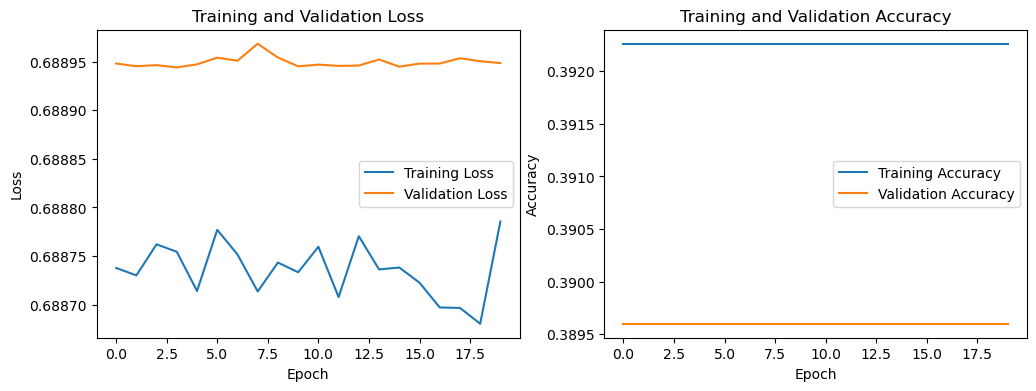

In [40]:
# 可视化训练过程
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()